<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

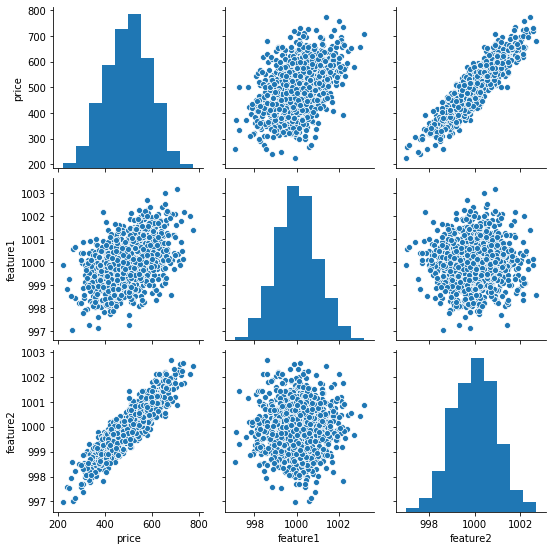

In [5]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [14]:
scaler = MinMaxScaler()

In [15]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [22]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [23]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [24]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [25]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 729us/sample - loss: 256604.8107
Epoch 2/250
700/700 [==============================] - 0s 66us/sample - loss: 256462.2027
Epoch 3/250
700/700 [==============================] - 0s 58us/sample - loss: 256319.8362
Epoch 4/250
700/700 [==============================] - 0s 59us/sample - loss: 256165.1452
Epoch 5/250
700/700 [==============================] - 0s 53us/sample - loss: 255993.1030
Epoch 6/250
700/700 [==============================] - 0s 51us/sample - loss: 255792.6892
Epoch 7/250
700/700 [==============================] - 0s 58us/sample - loss: 255559.1666
Epoch 8/250
700/700 [==============================] - 0s 60us/sample - loss: 255294.7536
Epoch 9/250
700/700 [==============================] - 0s 65us/sample - loss: 254996.9772
Epoch 10/250
700/700 [==============================] - 0s 59us/sample - loss: 254659.4687
Epoch 11/250
700/700 [==============================] - 0s 55us/sample - loss

700/700 [==============================] - 0s 69us/sample - loss: 1961.3563
Epoch 92/250
700/700 [==============================] - 0s 127us/sample - loss: 1922.9604
Epoch 93/250
700/700 [==============================] - 0s 89us/sample - loss: 1891.2511
Epoch 94/250
700/700 [==============================] - 0s 64us/sample - loss: 1852.9800
Epoch 95/250
700/700 [==============================] - 0s 54us/sample - loss: 1818.0530
Epoch 96/250
700/700 [==============================] - 0s 50us/sample - loss: 1780.5379
Epoch 97/250
700/700 [==============================] - 0s 56us/sample - loss: 1744.3709
Epoch 98/250
700/700 [==============================] - 0s 52us/sample - loss: 1710.4079
Epoch 99/250
700/700 [==============================] - 0s 52us/sample - loss: 1670.9638
Epoch 100/250
700/700 [==============================] - 0s 55us/sample - loss: 1644.5374
Epoch 101/250
700/700 [==============================] - 0s 69us/sample - loss: 1610.4824
Epoch 102/250
700/700 [========

700/700 [==============================] - 0s 52us/sample - loss: 37.5456
Epoch 184/250
700/700 [==============================] - 0s 55us/sample - loss: 35.3194
Epoch 185/250
700/700 [==============================] - 0s 47us/sample - loss: 32.9832
Epoch 186/250
700/700 [==============================] - 0s 52us/sample - loss: 31.5794
Epoch 187/250
700/700 [==============================] - 0s 56us/sample - loss: 30.3141
Epoch 188/250
700/700 [==============================] - 0s 57us/sample - loss: 29.2439
Epoch 189/250
700/700 [==============================] - 0s 56us/sample - loss: 28.4435
Epoch 190/250
700/700 [==============================] - 0s 55us/sample - loss: 27.6441
Epoch 191/250
700/700 [==============================] - 0s 62us/sample - loss: 27.0999
Epoch 192/250
700/700 [==============================] - 0s 52us/sample - loss: 26.7935
Epoch 193/250
700/700 [==============================] - 0s 50us/sample - loss: 26.1163
Epoch 194/250
700/700 [=======================

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [26]:
model.history.history

{'loss': [256604.8107142857,
  256462.20267857143,
  256319.83625,
  256165.14517857143,
  255993.10303571427,
  255792.68919642858,
  255559.16660714286,
  255294.75357142856,
  254996.97723214285,
  254659.46866071428,
  254282.71901785713,
  253861.12125,
  253390.1745535714,
  252868.25419642858,
  252289.33339285714,
  251651.29589285713,
  250951.51125,
  250179.76660714287,
  249337.8723214286,
  248425.17625,
  247431.8775,
  246350.15008928571,
  245182.30089285714,
  243928.6986607143,
  242575.10205357143,
  241114.57473214285,
  239548.893125,
  237869.96705357142,
  236086.34883928573,
  234187.19785714286,
  232155.99410714285,
  229997.56625,
  227712.00758928573,
  225282.75517857142,
  222724.26580357144,
  220026.375,
  217168.58794642857,
  214185.045,
  211041.0994642857,
  207730.2574107143,
  204248.8536607143,
  200615.9007142857,
  196868.90973214287,
  192934.38446428571,
  188820.59366071428,
  184537.79330357144,
  180130.10642857142,
  175544.47357142856,
  

In [27]:
loss = model.history.history['loss']

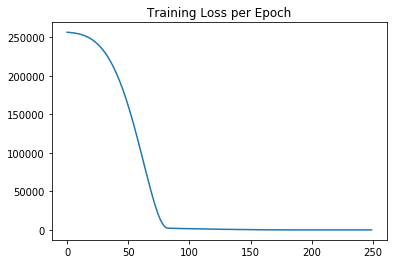

In [28]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [29]:
model.metrics_names

['loss']

In [30]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [31]:
training_score

26.612815987723213

In [32]:
test_score

29.563612060546873

### Further Evaluations

In [33]:
test_predictions = model.predict(X_test)

In [34]:
test_predictions

array([[406.9213 ],
       [626.02216],
       [594.505  ],
       [574.4787 ],
       [368.03992],
       [581.4804 ],
       [517.0564 ],
       [460.9717 ],
       [551.4091 ],
       [449.34326],
       [614.22394],
       [551.1944 ],
       [420.78104],
       [410.50198],
       [653.89246],
       [439.07196],
       [510.53384],
       [662.50714],
       [665.19745],
       [567.81696],
       [335.55273],
       [446.61624],
       [384.04767],
       [380.2858 ],
       [568.85187],
       [612.99445],
       [534.50964],
       [429.58548],
       [658.0175 ],
       [415.77008],
       [444.43576],
       [487.07132],
       [440.17966],
       [684.5325 ],
       [426.50308],
       [419.34207],
       [503.99747],
       [552.67816],
       [511.72836],
       [396.89572],
       [621.0675 ],
       [418.32123],
       [606.8684 ],
       [447.7911 ],
       [503.99704],
       [584.09827],
       [671.7075 ],
       [492.389  ],
       [319.8988 ],
       [487.36624],


In [35]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [36]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [37]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [38]:
test_predictions

0      406.921295
1      626.022156
2      594.505005
3      574.478699
4      368.039917
          ...    
295    531.133484
296    517.298279
297    612.086487
298    418.659088
299    412.507172
Length: 300, dtype: float32

In [39]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [40]:
pred_df.columns = ['Test Y','Model Predictions']

In [41]:
pred_df

,Test Y,Model Predictions
0,402.296319,406.921295
1,624.156198,626.022156
2,582.455066,594.505005
3,578.588606,574.478699
4,371.224104,368.039917
...,...,...
295,525.704657,531.133484
296,502.909473,517.298279
297,612.727910,612.086487
298,417.569725,418.659088


Let's compare to the real test labels!

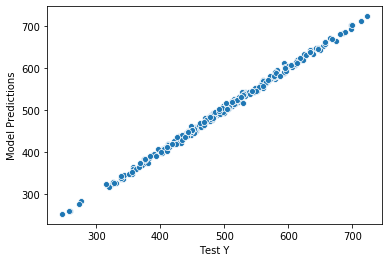

In [42]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [43]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

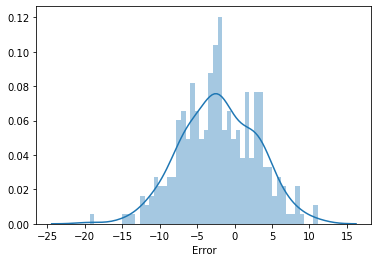

In [44]:
sns.distplot(pred_df['Error'],bins=50)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.420987098240393

In [47]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

29.56361392276262

In [48]:
# Essentially the same thing, difference just due to precision
test_score

29.563612060546873

In [49]:
#RMSE
test_score**0.5

5.437243056968014

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [50]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [51]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [52]:
new_gem = scaler.transform(new_gem)

In [53]:
model.predict(new_gem)

array([[421.32092]], dtype=float32)

## Saving and Loading a Model

In [54]:
from tensorflow.keras.models import load_model

In [55]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [56]:
later_model = load_model('my_model.h5')

In [57]:
later_model.predict(new_gem)

array([[421.32092]], dtype=float32)